##pre-processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('World Population by country 2024.csv')
df.head()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3M,485.0,0.0092,0.1801,1
1,China,1425178782,1425671352,9.4M,151.0,-0.0003,0.1780,2
2,United States,341814420,339996563,9.1M,37.0,0.0053,0.0427,3
3,Indonesia,279798049,277534122,1.9M,149.0,0.0082,0.0350,4
4,Pakistan,245209815,240485658,770.9K,318.0,0.0196,0.0306,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          234 non-null    object 
 1   Population 2024  234 non-null    int64  
 2   Population 2023  234 non-null    int64  
 3   Area (km2)       234 non-null    object 
 4   Density (/km2)   234 non-null    float64
 5   Growth Rate      234 non-null    float64
 6   World %          228 non-null    float64
 7   World Rank       234 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 14.8+ KB


In [4]:
##converting area from object to float
def convarea(area):
  area = area.strip().replace('<','').strip()
  #removing '<' characters
  if 'M' in area:
    area = float(area.replace('M',''))*1000000
  elif 'K' in area:
    area = float(area.replace('K',''))*1000
  else:
    area = float(area)
  return area

df['Area (km2)'] = df['Area (km2)'].apply(convarea)
df.head()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3000000.0,485.0,0.0092,0.1801,1
1,China,1425178782,1425671352,9400000.0,151.0,-0.0003,0.1780,2
2,United States,341814420,339996563,9100000.0,37.0,0.0053,0.0427,3
3,Indonesia,279798049,277534122,1900000.0,149.0,0.0082,0.0350,4
4,Pakistan,245209815,240485658,770900.0,318.0,0.0196,0.0306,5


In [5]:
df.fillna(0, inplace = True)
df.isnull().sum()

Country            0
Population 2024    0
Population 2023    0
Area (km2)         0
Density (/km2)     0
Growth Rate        0
World %            0
World Rank         0
dtype: int64

##visualizations

In [6]:
fig = px.bar(df[0:10], x="Country", y="Population 2024", color="Growth Rate", barmode="relative")
#checking growth rates of different countries according to their population
fig.show()

In [7]:
fig = px.bar(df[50:100], x="Country", y="Population 2024", color="Growth Rate", barmode="relative")
fig.show()

In [8]:
#population change
df['population change'] = df['Population 2024'] - df['Population 2023']
fig = px.bar(df.nlargest(10,'population change').sort_values(by= 'population change'),
             x = 'population change', y = 'Country', color = 'Growth Rate',
             barmode = 'relative',
             title= "top 10 countries with most population change")
fig.show()

In [9]:
#scatter plot for growth rate vs world rank
fig = px.scatter(df, x = "Growth Rate", y = "World Rank",
                 title = "Growth Rate vs World Rank",
                 color = "Density (/km2)",
                 hover_name = "Country",
                 hover_data = ['Population 2024', 'Population 2023', 'Area (km2)', 'Density (/km2)', 'World %'],
                 template = "plotly_dark")
fig.show()

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



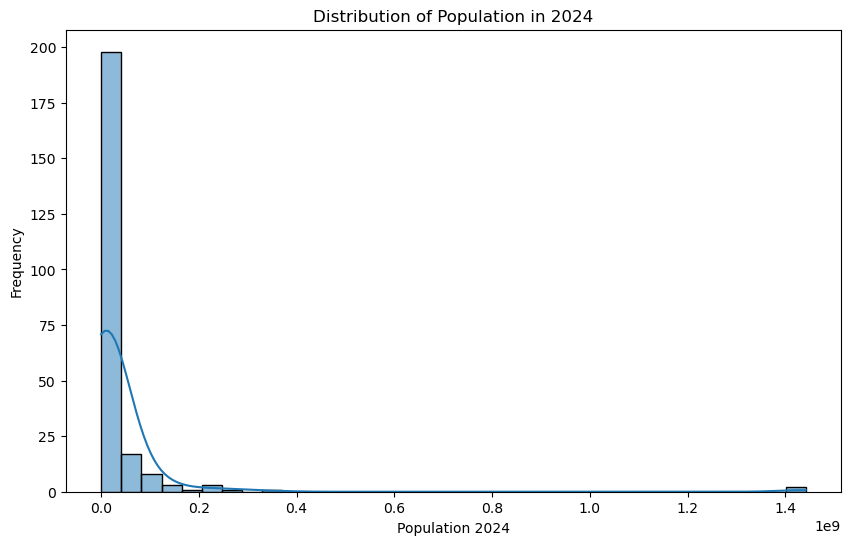

In [10]:
#distribution of population
plt.figure(figsize=(10, 6))
sns.histplot(df['Population 2024'],bins = 35, kde=True)
plt.title('Distribution of Population in 2024')
plt.xlabel('Population 2024')
plt.ylabel('Frequency')
plt.show()

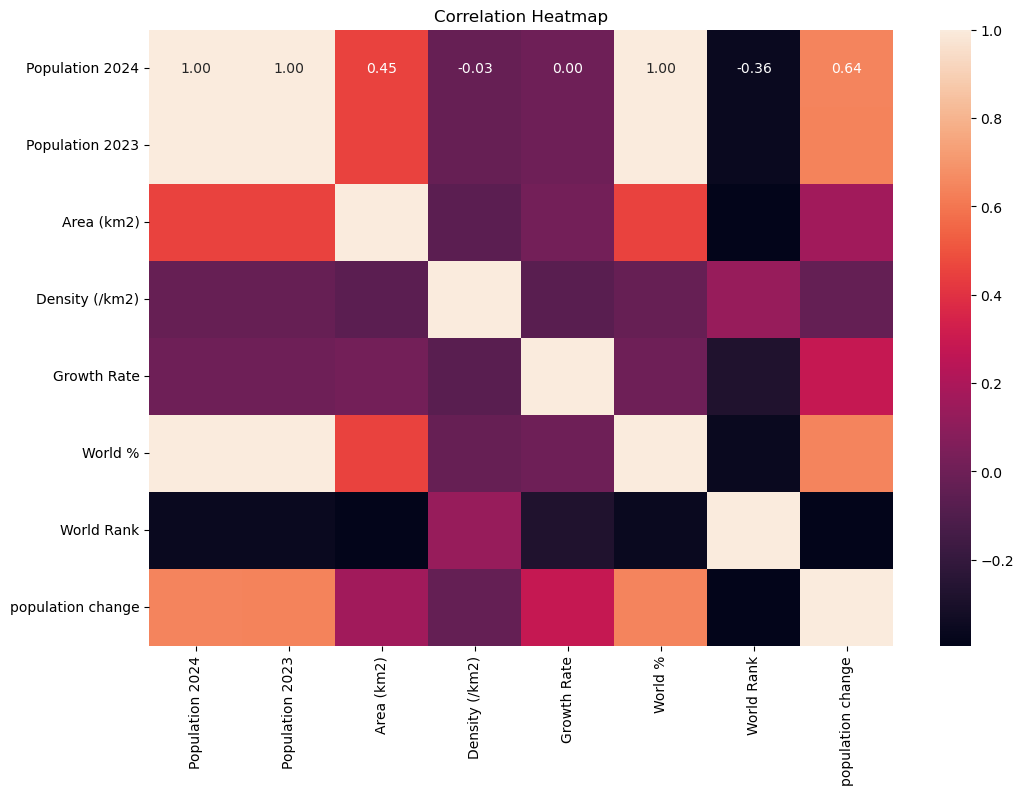

In [11]:
# Plot the correlation heatmap
numericvalues = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numericvalues.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Predictions

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            234 non-null    object 
 1   Population 2024    234 non-null    int64  
 2   Population 2023    234 non-null    int64  
 3   Area (km2)         234 non-null    float64
 4   Density (/km2)     234 non-null    float64
 5   Growth Rate        234 non-null    float64
 6   World %            234 non-null    float64
 7   World Rank         234 non-null    int64  
 8   population change  234 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 16.6+ KB


In [13]:
#train test split
x = df[['Population 2023','Area (km2)', 'Density (/km2)', 'Growth Rate', 'population change']]
y = df['Population 2024']
from sklearn.model_selection import train_test_split as tts
x_train, x_test,y_train, y_test = tts(x,y,test_size = 0.2, random_state = 42)
#standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trainscaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
#linear regression
model1 = LinearRegression()
model1.fit(x_trainscaled, y_train)
y_pred1 = model1.predict(x_test_scaled)
print("------------------------------------------")
print("linear regression: ")
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred1))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred1))
print("r2 Score : ", r2_score(y_test, y_pred1))
print("------------------------------------------")
#decision tree
model2 = DecisionTreeRegressor()
model2.fit(x_trainscaled, y_train)
y_pred2 = model2.predict(x_test_scaled)
print("------------------------------------------")
print("decision tree: ")
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred2))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred2))
print("r2 Score : ", r2_score(y_test, y_pred2))
print("------------------------------------------")
#SVR
model3 = SVR()
model3.fit(x_trainscaled, y_train)
y_pred3 = model3.predict(x_test_scaled)
print("------------------------------------------")
print("SVR: ")
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred3))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred3))
print("r2 Score : ", r2_score(y_test, y_pred3))
print("------------------------------------------")
#ranndom forest
model4 = RandomForestRegressor()
model4.fit(x_trainscaled, y_train)
y_pred4 = model4.predict(x_test_scaled)
print("------------------------------------------")
print("random forest: ")
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred4))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred4))
print("r2 Score : ", r2_score(y_test, y_pred4))
print("------------------------------------------")

------------------------------------------
linear regression: 
Mean Squared Error :  1.4429946599316862e-15
Mean Absolute Error :  3.146681379764638e-08
r2 Score :  1.0
------------------------------------------
------------------------------------------
decision tree: 
Mean Squared Error :  30251304845364.19
Mean Absolute Error :  1815536.4042553192
r2 Score :  0.9745628822426613
------------------------------------------
------------------------------------------
SVR: 
Mean Squared Error :  1414194431917338.5
Mean Absolute Error :  20295944.8614241
r2 Score :  -0.1891397901788927
------------------------------------------
------------------------------------------
random forest: 
Mean Squared Error :  4017364672440.2817
Mean Absolute Error :  804067.8634042556
r2 Score :  0.9966219580024928
------------------------------------------


##end
